In [30]:
import pandas as pd 

Df=pd.read_csv(r'/content/seattle-weather.csv')
Df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [31]:
Df.describe

<bound method NDFrame.describe of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [32]:
Df.info

<bound method DataFrame.info of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [33]:
Df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [34]:
Df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [35]:
Df.corr()

<ipython-input-35-ed7d53894b54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<ipython-input-36-811d1e1adcc6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (Df.corr ())


<Axes: >

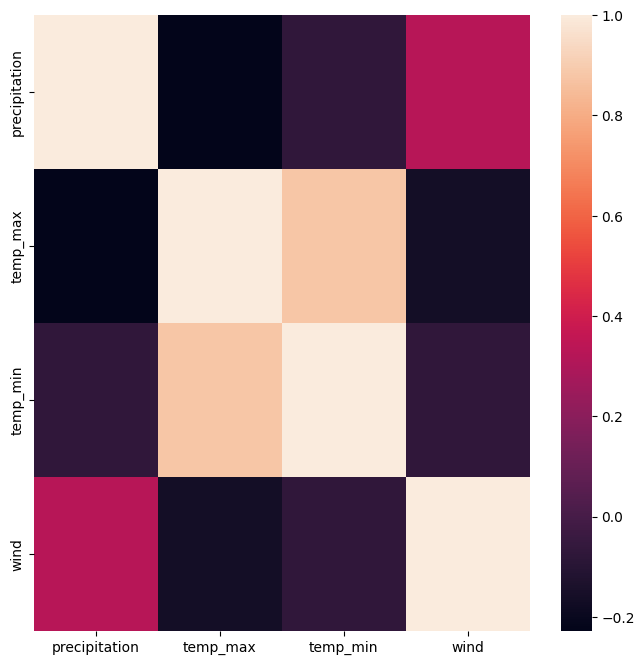

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap (Df.corr ())

<Axes: >

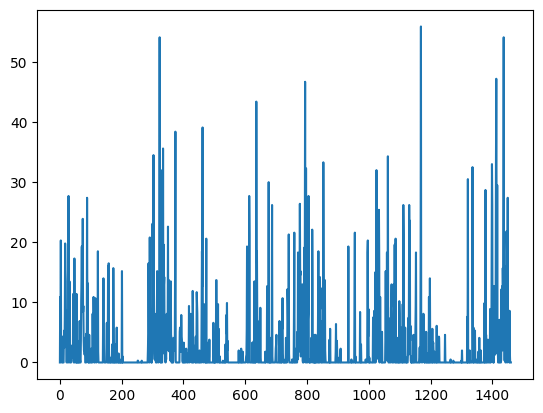

In [37]:
Df.precipitation.plot()

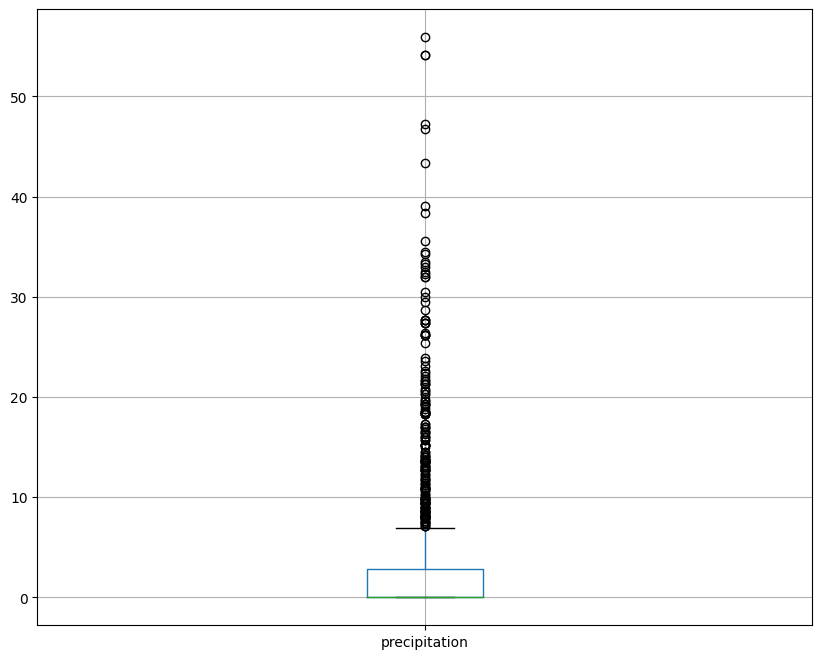

In [52]:
figure=plt.figure (figsize=(10,8))
Df.boxplot(column='precipitation')

plt.show()

😮There are lots of outliers, 
try to remove...

In [57]:
Q1=Df.precipitation.quantile(0.25)
Q1

0.0

In [60]:
Median= Df.precipitation.median
Median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        0.0
1       10.9
2        0.8
3       20.3
4        1.3
        ... 
1456     8.6
1457     1.5
1458     0.0
1459     0.0
1460     0.0
Name: precipitation, Length: 1461, dtype: float64>

In [61]:
Q3=Df.precipitation.quantile(0.75)
Q3

2.8

In [62]:
IQR=Q3-Q1
IQR

2.8

In [63]:
Df=Df [~((Df.precipitation <(Q1-1.5*IQR)) | (Df.precipitation >(Q3+1.5*IQR)))]
Df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Outliers removed

In [64]:
1461-1255
#206 rows removed

206

<Axes: >

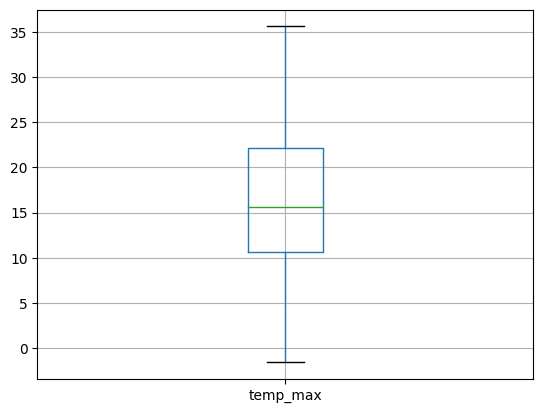

In [53]:
Df.boxplot(column='temp_max')

<Axes: >

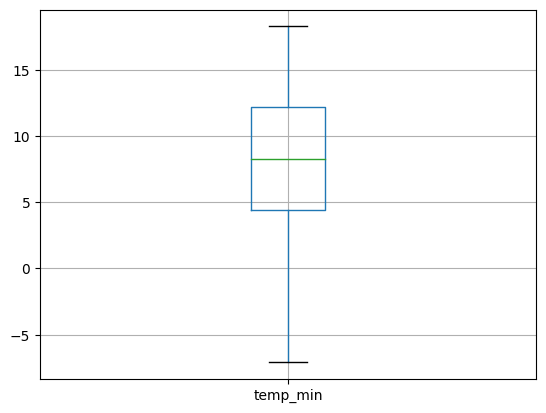

In [54]:
Df.boxplot(column ='temp_min')

<Axes: >

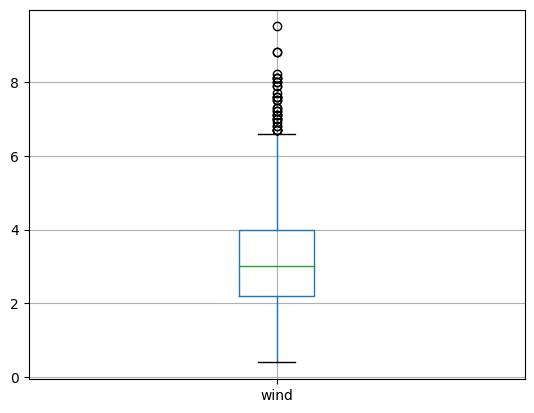

In [55]:
Df.boxplot(column ='wind')

In [66]:
Q1=Df.wind.quantile(0.25)
Q3=Df.wind.quantile(0.75)

IQR= Q3-Q1
IQR

1.5999999999999996

In [67]:
Df=Df [~((Df.wind <(Q1-1.5*IQR)) | (Df.wind>(Q3+1.5*IQR)))]
Df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


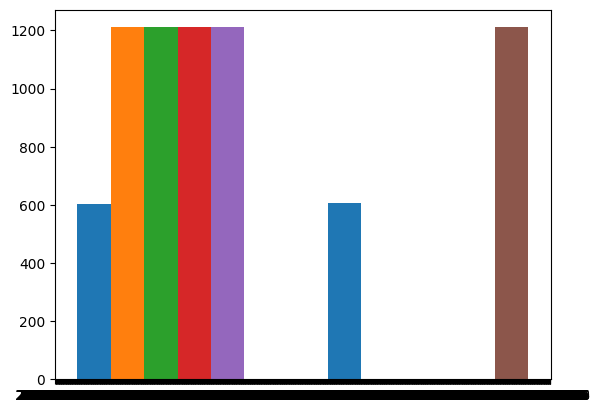

<Figure size 1000x1000 with 0 Axes>

In [69]:
plt.hist(Df,2)
plt.figure (figsize=(10,10))
plt.show()

Uniform distribution 

It represents the probability  which all outcomes have the equal probability.

In [82]:
from scipy.stats  import uniform
#probability of precipitation less than 2 
uniform.cdf(2,0,20)

0.1

In [83]:

#probability of more than 2
uniform.sf (2,0,20)

0.9

Poisson Distribution 

It gives probability of an event happening a certain time within interval of time orspace.

In [84]:
from scipy.stats import poisson
#probability of having 4 occurances(lembda=3,k=4) 
poisson.pmf(4,3)

0.16803135574154085

In [85]:

#probability of having less than 4 
poisson.cdf (4,3)

0.8152632445237722

In [86]:
poisson.sf (1,3)#more than 4

0.8008517265285442

In [ ]:
Df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64